In [80]:
import pandas as pd
import numpy as np
import time
import datetime
import scipy.signal as sp

In [81]:
columns = ['sample_index', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'A1', 'A2', 'A3', 'timestamp']

In [82]:
sean = pd.read_table('recorded_data/Seantry4_GoodandBad/OpenBCI-RAW-Seantry4_GoodandBad.txt', delimiter=',', names=columns)

In [83]:
sean_time = np.loadtxt('recorded_data/Seantry4_GoodandBad/sean_good_bad_23.57_time')

In [84]:
sean.head()

,sample_index,C1,C2,C3,C4,C5,C6,C7,C8,A1,A2,A3,timestamp
0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.108,0.936,0.282,23:03:12.163
1,1,77845.65,128941.87,42941.84,131814.56,82552.90,183557.86,154589.27,174537.75,0.000,0.000,0.000,23:03:12.179
2,2,77859.23,128942.05,42930.91,131824.58,82528.63,183562.67,154596.53,174540.05,0.000,0.000,0.000,23:03:12.195
3,3,77930.45,128968.33,42923.82,131877.98,82507.10,183566.89,154591.83,174539.14,0.000,0.000,0.000,23:03:12.228
4,4,77956.31,128951.30,42911.41,131875.72,82518.55,183582.50,154581.63,174543.89,0.000,0.000,0.000,23:03:12.228


### Not needed

In [6]:
pd.to_datetime(int(sean_time[0]))

Timestamp('1970-01-01 00:00:01.523167405')

In [7]:
import datetime
print(datetime.datetime.fromtimestamp((sean_time[0])))
datetime.datetime.timestamp(datetime.datetime.fromtimestamp((sean_time[0])))

2018-04-07 23:03:25.013417


1523167405.013417

In [8]:
datetime.datetime.fromtimestamp((sean_time[0]))

datetime.datetime(2018, 4, 7, 23, 3, 25, 13417)

In [117]:
s = "2018-04-07 23:03:25.111"


0.09758281707763672

In [119]:
yr = "2018-04-07 "
str_fixed = yr + sean.timestamp[0]
datetime.datetime.timestamp(datetime.datetime.strptime(str_fixed, "%Y-%m-%d %H:%M:%S.%f")) - sean_time[0]

-12.834417343139648

### end

In [14]:
sean = sean.dropna()

In [15]:
sec = []
yr = "2018-04-07"
for i in sean.timestamp:
    str_fixed = yr + i
    sec.append(datetime.datetime.timestamp(datetime.datetime.strptime(str_fixed, "%Y-%m-%d %H:%M:%S.%f")))

In [16]:
sec = pd.Series(sec, name = 'sec')

In [17]:
data = pd.concat([sean, sec], axis = 1)

In [18]:
sean_time[0]

1523167405.0134172

In [19]:
data.sec[0] - sean_time[0] 

-12.850417137145996

In [20]:
data.shape

(748026, 14)

In [21]:
#data[abs(sec - sean_time[0]) <= 2*1e-2]

In [22]:
#data1 = pd.concat([data, data[:2]])

In [23]:
#data1

In [24]:
start = sec[0]

fixed_time = [start]
for i in range(754100):
    fixed_time.append(fixed_time[-1]+(1/250))
    
fixed_time = pd.Series(fixed_time, name = 'fixed_time')
fixed_time = fixed_time[:data.sec.shape[0]]
fixed_time.shape

(748026,)

In [25]:
data = pd.concat([sean, fixed_time], axis = 1)

In [26]:
exp_beg = data[abs(fixed_time - sean_time[0]) <= 2*1e-3].index[0]

In [27]:
nonfiltered_data = data[exp_beg:].drop(['timestamp', 'A1', 'A2', 'A3'], axis = 1).reset_index(drop = True)


In [28]:
nonfiltered_data.head()

,sample_index,C1,C2,C3,C4,C5,C6,C7,C8,fixed_time
0,254,78950.43,130486.55,32289.24,131189.09,83367.65,183438.33,154473.06,174455.09,1.523167e+09
1,255,78933.48,130488.34,32287.00,131159.78,83366.55,183448.00,154466.63,174466.98,1.523167e+09
2,0,78763.81,130471.35,32293.04,131088.42,83375.27,183446.75,154455.48,174469.69,1.523167e+09
3,1,78792.09,130478.48,32300.01,131113.45,83381.10,183445.95,154462.89,174465.50,1.523167e+09
4,2,78935.48,130506.63,32300.57,131192.95,83384.27,183453.97,154470.80,174464.13,1.523167e+09


In [29]:
no_white = nonfiltered_data[2560:].reset_index(drop = True)

In [30]:
# load answers:
pict = np.loadtxt('recorded_data/Seantry4_GoodandBad/sean_good_bad_23.57_pictures_only', dtype='<U9')

In [31]:
pict.shape

(246,)

In [32]:
ans = []
for i in pict:
    if i[0] == 'P':
        ans.append(1) #1 = positive
    else:
        ans.append(0) #0 -negative
    ans.append(3) #3 - black
ans = np.array(ans)

In [33]:
ans.shape[0]/2

246.0

In [34]:
no_white.shape

(742253, 10)

In [35]:
no_white.head()

,sample_index,C1,C2,C3,C4,C5,C6,C7,C8,fixed_time
0,254,76513.39,131766.45,33177.09,131464.44,83188.27,183180.31,154597.98,174303.56,1.523167e+09
1,255,76456.30,131766.44,33188.96,131413.30,83199.52,183180.78,154584.03,174310.98,1.523167e+09
2,0,76337.04,131742.30,33211.14,131348.88,83211.81,183176.25,154591.70,174313.78,1.523167e+09
3,1,76386.05,131744.16,33210.45,131382.13,83209.82,183176.86,154601.16,174319.33,1.523167e+09
4,2,76516.57,131771.44,33195.38,131458.20,83195.34,183176.61,154596.80,174316.88,1.523167e+09


In [36]:
print([i for i in range(10)])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [37]:
no_white[0:2000].shape

(2000, 10)

In [38]:
lbl_data = []

for i in range(ans.shape[0]):
    if ans[i] != 3:
        lbl_data.append(no_white[i:i+8*250])
    if ans[i] == 3:
        lbl_data.append(no_white[i:i+4*250])

In [39]:
len(lbl_data) == len(ans)

True

In [40]:
lbl_data[0].head()

,sample_index,C1,C2,C3,C4,C5,C6,C7,C8,fixed_time
0,254,76513.39,131766.45,33177.09,131464.44,83188.27,183180.31,154597.98,174303.56,1.523167e+09
1,255,76456.30,131766.44,33188.96,131413.30,83199.52,183180.78,154584.03,174310.98,1.523167e+09
2,0,76337.04,131742.30,33211.14,131348.88,83211.81,183176.25,154591.70,174313.78,1.523167e+09
3,1,76386.05,131744.16,33210.45,131382.13,83209.82,183176.86,154601.16,174319.33,1.523167e+09
4,2,76516.57,131771.44,33195.38,131458.20,83195.34,183176.61,154596.80,174316.88,1.523167e+09


In [41]:
dataset = []

for i in lbl_data:
    feature = []
    for j in ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']:
        ch = i[j]
        f, Pxx_spec = sp.welch(ch, 250, nperseg = 250)
        alpha_ch = np.mean(Pxx_spec[(f>=8) & (f<=13)])
        beta_ch = np.mean(Pxx_spec[(f>13) & (f<=30)])
        theta_ch = np.mean(Pxx_spec[(f>=4) & (f<=7)])
        gamma_ch = np.mean(Pxx_spec[(f>=30) & (f<=50)])
        feature.append(alpha_ch)
        feature.append(beta_ch)
        feature.append(theta_ch)
        feature.append(gamma_ch)    
    dataset.append(feature)

In [42]:
cols = []
for j in ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']:
    col = [i+'_' +j for i in ['alpha', 'beta', 'theta', 'gamma']]
    cols +=col

In [43]:
processed_data = pd.DataFrame(dataset, columns=cols)

### End of meaningful part

In [47]:
#Training

from sklearn.svm import SVC

In [48]:
processed_data.shape

(492, 32)

In [49]:
ans.shape

(492,)

In [50]:
clf = SVC()#class_weight = 'balanced')
clf.fit(processed_data[:400], ans[:400]) 
#SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
#    max_iter=-1, probability=False, random_state=None, shrinking=True,
#    tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
from sklearn.metrics import accuracy_score
ans_pred= clf.predict(processed_data[400:])

accuracy_score(ans[400:], ans_pred)

0.40217391304347827

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, max_depth=100000, random_state = 0,class_weight = 'balanced')
rf.fit(processed_data[:400], ans[:400]) 

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=100000, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [53]:
ans_pred= rf.predict(processed_data[400:])

accuracy_score(ans[400:], ans_pred)

0.7717391304347826

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, processed_data, ans, cv=6)

In [64]:
np.mean(scores)

0.6345505478704944

In [68]:
float(np.array(['1','2'])[0])

1.0

In [73]:
np.apply_along_axis(float, 0, np.array(['1','2']))

TypeError: only size-1 arrays can be converted to Python scalars

In [78]:
#import time
#def follow(thefile):
    #thefile.seek(0,2)
#    while True:
#        line = thefile.readline()
#        if not line:
#            time.sleep(0.1)
#            continue
#        yield line

#if __name__ == '__main__':
#logfile = open("sean_EEG","r")
#loglines = follow(logfile)
#current_data = []
#for line in loglines:
#    if (line[0:1] != '\n') and (line[0:1] != '--') and (line[0:1] != 'ID') and (line.count('.') != 3):
#        my_float_list = [float(x) for x in line[:-1].split(',')]
#        current_data.append(my_float_list)
#    if len(current_data) == 1:
#        print(line)
    #pass
    #print(line)

In [79]:
#current_data

In [ ]:
import cv2 as cv
import os

current = []
for i in lbl_data:
    feature = []
    for j in ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']:
        ch = i[j]
        f, Pxx_spec = sp.welch(ch, 250, nperseg = 250)
        alpha_ch = np.mean(Pxx_spec[(f>=8) & (f<=13)])
        beta_ch = np.mean(Pxx_spec[(f>13) & (f<=30)])
        theta_ch = np.mean(Pxx_spec[(f>=4) & (f<=7)])
        gamma_ch = np.mean(Pxx_spec[(f>=30) & (f<=50)])
        feature.append(alpha_ch)
        feature.append(beta_ch)
        feature.append(theta_ch)
        feature.append(gamma_ch)    
    current.append(feature)
    if len(current) > 8:
        current = current[:-1]
    
rf.predict(current)


In [59]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=5000)
gb.fit(processed_data[:400], ans[:400]) 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [45]:
ans_pred= gb.predict(processed_data[400:])

accuracy_score(ans[400:], ans_pred)

0.5760869565217391

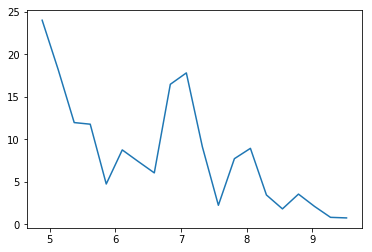

In [231]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(f[20:40], Pxx_spec[20:40])

In [105]:
sean_time[0]

1523167405.0134172

In [18]:
data.shape

(748025, 14)

In [19]:
a = (data.timestamp)

In [20]:
a.drop_duplicates().shape

(159219,)

array([1.52316739e+09, 1.52316739e+09, 1.52316739e+09, ...,
       1.52317038e+09, 1.52317038e+09, 1.52317038e+09])